## Tips-dataset analysis

Let's take a look at the inbuilt tips dataset provided by seaborn, ask some questions and answer them using different Python libraries!

## Part I  
  
  # Descriptive statistics

In [1]:
#import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

First, I import the CSV file as Dataframe with pandas using these lines of code:

In [2]:
#Pandas read csv file from the url
df=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

#show first five rows of the dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Showing the first five rows of the dataset using **df.head()** we can se that dataset has several variables, named **total_bill, tip, sex, smoker, day, time** and **size**.  
**total_bill** - total bill amount paid, in US dollars
**tip** - tip amount, in US dollars
**sex** - sex of the person paying the bill  
**smoker** - 'yes' if there was a smoker in the group
**day** - day of the week  
**time** - lunch/dinner  
**size** - size of the group

**df.shape** returns the rows and the column count of the dataset.  
We can se that tips dataset has 244 rows and 7 columns.

In [5]:
#shape of the dataset (rows,columns)
df.shape

(244, 7)

**df.describe** returns some statistic data about the numerical columns in the dataset - **total_bil, tip** and **size**.  
Here we can see the min and max tip amount compared to the total bill amount. Another thing we can read from this table is that half of the tips are below 2.9, and only half above that, even though the maximum tip amount is 10. The mean of tip amounts is 2.99 and therefore we can say that there are no extreme values.   We can also see the max size of the group visited the restaurant.


In [6]:
#statistical details of the dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


By deviding mean of the *tip* variable with the mean of the *total_bill* variable we see **what percentage of the bill do guests on average leave as tip.** On average, the guests leave 15% of the bill as a tip. 

In [21]:
#change the / operator to mean true division throughout the module
from __future__ import division

#creating two variables, tip mean and total_bill mean
meantip = df['tip'].mean()
meantbill = df['total_bill'].mean()

#calculate on average tip percentage 
perctip = meantip/meantbill
perctip


0.15153580224410024

**df.types** returns the data type of each column.  
We can see that our dataset contains three numerical values, two of which are floats and one integer. Other four variables are objects, i.e. string variables.

In [7]:
#variable types
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### Histogram

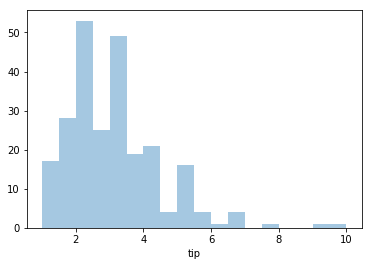

In [10]:
#plotting histogram of the 'tip' variable using seaborn package
sns.distplot(df['tip'], kde=False)

From this histogram we can see that most tips are between 2 and 4.

### Kerner density estimate (KDE)

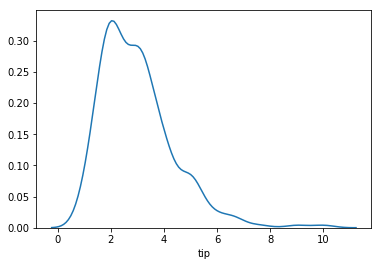

In [13]:
#kde plot of the 'tip' variable using seaborn package
sns.distplot(df['tip'],hist=False)

KDE plot is very useful when we want to see the distribution of the variable and estimate the probability density of the variable. Again, from the plot we can see that the probability that the tip will be between 2 and 4 is the highest.

## Part II  
  
  ## Relationship between tips and total_bill

In the scatter plot below, we can see the relationship between total bill and tip amount. 

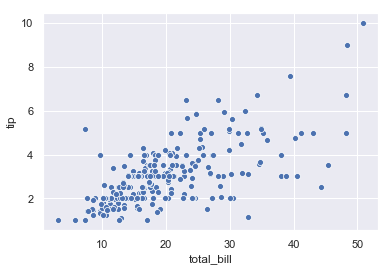

In [14]:
#set aesthetic parameters
sns.set()
#scatter of the variables 'total_bill' and 'tip'
tips_totalbill = sns.scatterplot(x="total_bill", y="tip", data=df)

### Linear regression model

We see that there is some kind of relationship between the two variables. But what kind of relationship it is? How strong is it? I will use Linear regression model to test the linear relationship between variables.  
The next step is to divide the data into independent and dependent variable. In this case, I am using 'total_bill' variable as independent (x) and 'tips' as dependent variable (y) because I want to see how tips change with the cange in the total bill.  

In [19]:
# providing data for regression
x = df['total_bill'].values.reshape(-1,1)
y = df['tip'].values.reshape(-1,1)

I am calling .reshape() on x and y because the variables are required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies. 

The next step is to create a linear regression model and fit it using the existing data.

In [21]:
#creating variable 'model' as a linear regression model
model = LinearRegression()

In [28]:
#fitting the model
#calculates the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
#obtain the coefficient of determination (𝑅²)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.45661658635167657


In [29]:
#intercept of the model 𝑏₀ 
print('intercept:', model.intercept_)
#coefficient of the model 𝑏₁
print('slope:', model.coef_)

intercept: [0.92026961]
slope: [[0.10502452]]


**The interpretation** of the intercept is not very useful for us in this case, since we don't expect 'total_bill' to be equal to zero at any point.  The value 𝑏₁ = 0.54 means that if 'total_bill' increases by 1, 'tip' will increase by aproximately 0.11.

Since now I have a satisfactory model, I can use it for predictions with either existing or new data.

In [32]:
#predicting the tip amount given the total_bill
y_pred = model.predict(x)
print('predicted tip:', y_pred, sep='\n')

predicted tip:
[[2.70463616]
 [2.00622312]
 [3.12683472]
 [3.40725019]
 [3.5028225 ]
 [3.57633966]
 [1.84133463]
 [3.74332864]
 [2.49983836]
 [2.47253198]
 [1.99887141]
 [4.6234341 ]
 [2.53974767]
 [2.85587147]
 [2.47778321]
 [3.1866987 ]
 [2.00517288]
 [2.631119  ]
 [2.70253567]
 [3.0890259 ]
 [2.80230897]
 [3.05121707]
 [2.57650625]
 [5.06033609]
 [3.00185555]
 [2.79075627]
 [2.32444741]
 [2.25303074]
 [3.19930164]
 [2.98400138]
 [1.92325375]
 [2.84746951]
 [2.50193885]
 [3.09322688]
 [2.78760553]
 [3.4471595 ]
 [2.63321949]
 [2.69833469]
 [2.88317784]
 [4.20438627]
 [2.60486287]
 [2.75399769]
 [2.38431139]
 [1.93690694]
 [4.11301494]
 [2.84116804]
 [3.25496464]
 [4.32306398]
 [3.91871958]
 [2.81491191]
 [2.23727706]
 [2.0009719 ]
 [4.57617306]
 [1.96421332]
 [3.60469628]
 [2.96719746]
 [4.91225152]
 [3.69396712]
 [2.10074519]
 [5.98980307]
 [3.05121707]
 [2.3706582 ]
 [2.0776398 ]
 [2.84116804]
 [2.76765087]
 [3.02916192]
 [2.64792292]
 [1.24269488]
 [3.0449156 ]
 [2.49668762]
 [2.1

In [38]:
#making a new input
x_new = np.arange(20,40,5).reshape((-1, 1))
print(x_new)

#predicting a tip amount given the new input
y_new = model.predict(x_new)
print(y_new)

[[20]
 [25]
 [30]
 [35]]
[[3.02075996]
 [3.54588255]
 [4.07100514]
 [4.59612772]]


The scatter plot below shows the linear relationship we obtained with the model.

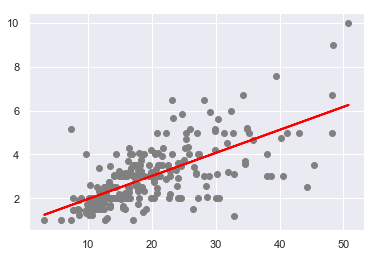

In [41]:
#scatter of inputs and outputs 
plt.scatter(x, y,  color='gray')
#line plot of predicted outputs 
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

Even though the given values are very dispersed, we can still see the positive linear relationship between total bill and tips.   
Keep in mind that we only have a single sample of data, and not the entire population of data.

## Part III  
  
  ## Relationship between variables

#### Day, Total_bill & Sex

Bar plot below shows the relationship between the variables *day* and *total_bill*. From the plot we can clearly see that the total bill is on average the highest on Sunday, comparing to Saturday, Friday and Thursday, and is the lowest on Friday. This expected since people are expected to go to the restaurants more over the weekend than they do in the weekdays. Another thing noticed from this plot is that the standard deviation of the total bill is noticabely the largest on Friday.  

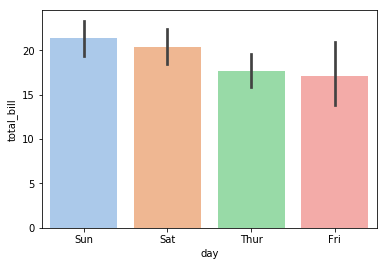

In [87]:
bar = sns.barplot(x="day", y="total_bill", data=df, palette="pastel")

To check if this conclusion is consistent with the numbers from the dataset, the table below presents the data grouped by different days of the week. We can see from the table that overall, the sum of total bills was higher on sunday than on saturday, but on average, the bill was higher on saturday.

In [9]:
#split the data into groups based on the variable 'day'
df.groupby(['day']).sum()

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In the bar plot below, the third variable, *sex* is added to the same plot. Here we can look at the differences in total bill amount between male and female groups of visitors throughout the week. We can highlight that male groups spend aproximately 10% more than female groups. That difference is even larger on Friday.  

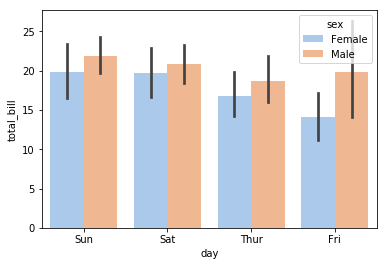

In [86]:
bar = sns.barplot(x="day", y="total_bill", hue="sex", data=df, palette="pastel")

#### Day & Tip

In the next bar plot, we can see that tips are on average the largest on Sunday and the lowest on Friday, which is consistent with the total bill amount.

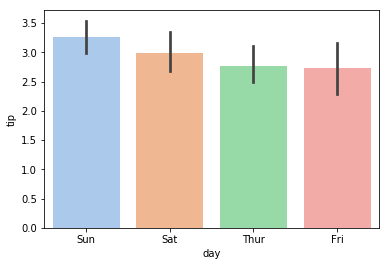

In [32]:
bar = sns.barplot(x="day", y="tip", data=df, palette="pastel")

#### Time, Tip & Total_bill

Bar plot below shows that tips are on average larger during the dinner time than lunch time by aproximately 0.5, which is visible from the table as well. We can see that around 70% of the total income of the restaurant comes from dinners.

In [10]:
df.groupby('time').sum()

,total_bill,tip,size
time,,,
Dinner,3660.30,546.07,463
Lunch,1167.47,185.51,164


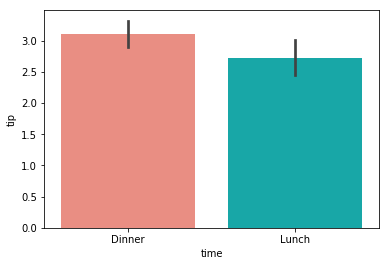

In [84]:
bar = sns.barplot(x="time",palette=["salmon","c"], y="tip", data=df, order=["Dinner", "Lunch"])

This scatter plot shows the relationship between total bill and tip, while taking in account different times for dinner and lunch. We can see that most of the orders are happening during dinner time.

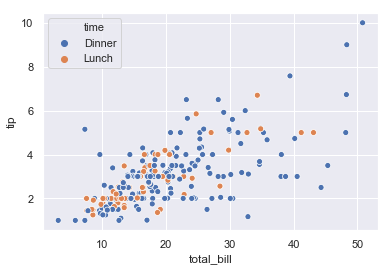

In [14]:
#scatter plot showing the relationship between total bill and the tip with added variable dinner
scatter = sns.scatterplot(x="total_bill", y="tip", hue="time", data=df)

#### Size, Total_bill & Tip

Furthermore, we can look at the relationship between the total bill and the size of the group. As expected, we can see that on average, total bill increases with the size of the group.

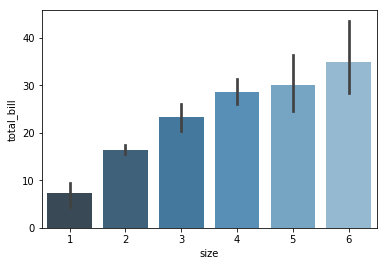

In [80]:
bar = sns.barplot("size", y="total_bill", data=df, palette="Blues_d")

Next scatter plot shows the relationship between total bill, tip amount and the size of the group visiting the restaurant. The bigger the group, larger the dot on the scatter plot. We can see that the dots are on average larger going further from the 0, as the total bill amount and tips increase.

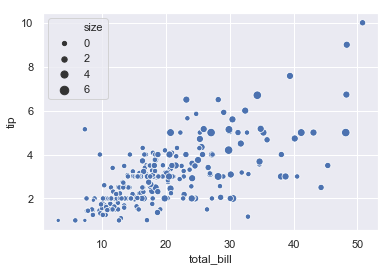

In [10]:
scatter = sns.scatterplot(x="total_bill", y="tip", size="size",data=df)

#### Total_bill, Tip & Smoker

Finally, let's look at the relationship between the tip and total bill considering whether the group has a smoker within it or not.

In [23]:
df['smoker'].describe()

count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

We can see that the most common value is 'No' and that it's frequency is 151, i.e. there is 151 Non-smoker groups in the data set. On the contrary, 93 groups had a smoker among them.  
Next, we can take a look at the average total bill and average tip amount within smokers and non-smokers.

In [26]:
print("Average total bill among smokers:", df[df["smoker"] == "Yes"]["total_bill"].mean())
print("Average total bill among non-smokers:", df[df["smoker"] == "No"]["total_bill"].mean())
print("Average tip among smokers:", df[df["smoker"] == "Yes"]["tip"].mean())
print("Average tip among non-smokers:", df[df["smoker"] == "No"]["tip"].mean())

Average total bill among smokers: 20.756344086021507
Average total bill among non-smokers: 19.18827814569537
Average tip among smokers: 3.008709677419355
Average tip among non-smokers: 2.9918543046357624


From this data, we can conclude that on average smokers are a tiny bit more generous when it comes to leaving tips, but their total bills tend to be bigger as well, which explains that.

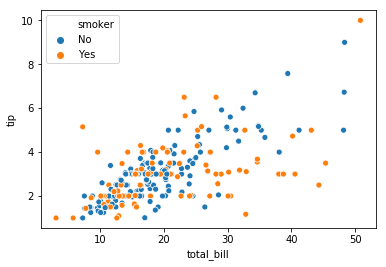

In [28]:
scatter = sns.scatterplot(x="total_bill", y="tip", hue="smoker",data=df)

From the scatter plot above, we can see that there is no clear pattern, if anything, there is more outliers in the *smoker* characteristic, which might explain the higher total bill & tip on average.

# The end